# This notebook visualizes voter turnout in Milwaukee County 
(with datasets created in the ```filter-mil.ipynb``` notebook)

In [1]:
# importing R and Python

%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

require('tidyverse')

R[write to console]: Loading required package: tidyverse



── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.2     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [4]:
# milwaukee presidential voter turnout and racial demographics 
# by ward in 2008, 12, 16, and 20.

mil_04_08 = pd.read_csv("mil_cnty_04_08.csv")
mil_12_20 = pd.read_csv("mil_cnty_12_20.csv")
mil_12_20.head()

,CNTY_NAME,MCD_NAME,CTV,ASM,SEN,CON,STR_WARDS,PERSONS18,WHITE18,BLACK18,...,OTHERMLT18,PRETOT20,PRETOT16,PRETOT12,TURNOUT12,TURNOUT16,TURNOUT20,PCTBLK,PCTHIS,PCTASI
0,Milwaukee,Bayside,V,23,8,4,0001,785.0,664.0,45.0,...,3.0,628.0,591.0,595.0,0.757962,0.752866,0.800000,0.057325,0.024204,0.063694
1,Milwaukee,Bayside,V,23,8,4,0002,474.0,435.0,3.0,...,1.0,495.0,465.0,439.0,0.926160,0.981013,1.044304,0.006329,0.027426,0.033755
2,Milwaukee,Bayside,V,23,8,4,0003,528.0,473.0,27.0,...,0.0,421.0,394.0,402.0,0.761364,0.746212,0.797348,0.051136,0.022727,0.024621
3,Milwaukee,Bayside,V,23,8,4,0004,733.0,674.0,20.0,...,1.0,758.0,692.0,676.0,0.922237,0.944065,1.034106,0.027285,0.023192,0.025921
4,Milwaukee,Bayside,V,23,8,4,0005,683.0,619.0,19.0,...,3.0,706.0,660.0,635.0,0.929722,0.966325,1.033675,0.027818,0.017570,0.038067


### Checking how much, if at all, voter turnout is correlated with the percent of Black voters in each voter ward.

__Hypothesis:__ Voter turnout of a ward decreases with increases in the percent of Black voters in that ward.

`geom_smooth()` using formula = 'y ~ x'


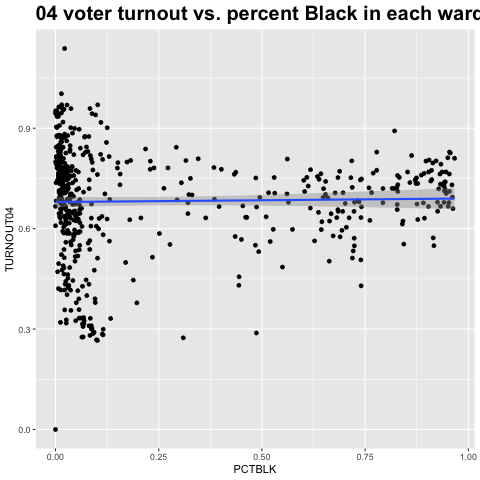

In [5]:
%%R -i mil_04_08

# Importing the dataframe from Python to R in this cell. 
# And plotting the 2004 presidential election voter turnout
# By the percent of Black adults in each ward

ggplot(mil_04_08) + 
    aes(x=PCTBLK, y=TURNOUT04) +
    geom_point() +
    geom_smooth(method="lm") +
    theme(plot.title = element_text(size=20, face="bold")) +
    labs(title = "04 voter turnout vs. percent Black in each ward", x = "PCTBLK", y = "TURNOUT04")

In [6]:
%%R

model <- lm(TURNOUT04 ~ PCTBLK, data=mil_04_08)
summary(model)


Call:
lm(formula = TURNOUT04 ~ PCTBLK, data = mil_04_08)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67949 -0.06531  0.02458  0.09807  0.45840 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.679488   0.008068  84.215   <2e-16 ***
PCTBLK      0.010658   0.019970   0.534    0.594    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1544 on 568 degrees of freedom
Multiple R-squared:  0.0005012,	Adjusted R-squared:  -0.001258 
F-statistic: 0.2848 on 1 and 568 DF,  p-value: 0.5938



### Interpretation:
It seems from the graph two cells above that the voter turnout in each ward in the 2004 Presidential election is not strongly correlated with the percent of Black voters in each ward. This is because the fitted line showing the correlation is very flat, with almost no increase or decrease in y (voter turnout) as x (percent black) increases.

The cell above shows the p-value of Percent Black voters and the Voter turnout to be at 0.594, which is much higher than 0.05. This means that there is a statistically insignificant relationship between the percent of Black voters in each ward and the voter turnout in 2004. 



## Therefore, we cannot say, based on this analysis, that the voter turnout in 2004's Presidential election was correlated with the percent of Black voters in each ward.

### Controlling for Asian and Hispanic voters:

Let's check the voter turnout against percent of Black voters while controlling for Asian and Hispanic adults (many of whom may not be eligible to vote)

In [7]:
%%R 

# It seems from the graph above that the voter turnout in each ward #
# is not correlated to the percent of Black voters in that ward.
model <- lm("TURNOUT04 ~ PCTBLK + PCTHIS + PCTASI", data=mil_04_08)
summary(model)


Call:
lm(formula = "TURNOUT04 ~ PCTBLK + PCTHIS + PCTASI", data = mil_04_08)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.43146 -0.04824  0.00734  0.06458  0.37481 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.789866   0.007676 102.896  < 2e-16 ***
PCTBLK      -0.069799   0.014231  -4.905 1.22e-06 ***
PCTHIS      -0.644696   0.026375 -24.444  < 2e-16 ***
PCTASI      -0.659395   0.102152  -6.455 2.33e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1071 on 566 degrees of freedom
Multiple R-squared:  0.5208,	Adjusted R-squared:  0.5182 
F-statistic:   205 on 3 and 566 DF,  p-value: < 2.2e-16



### Interpretation:

From this closer look at Black voter turnout while controlling for the percentage of Hispanic and Asian adults in each ward, we see that the p-value ```Pr(>|t|)``` for PCTBLK is smaller than 0.05. This means that the voter turnout in 2004's presidential election is correlated to the percent of Black voters in each ward. 

However, the correlation is not very strong. For every 100% increase in the percent of Black voters in a ward, there would only be a 7% decrease in the voter turnout.

This means, if the percent of Black voters doubled in a ward, the voter turnout would only go from n% to n+6%.

`geom_smooth()` using formula = 'y ~ x'


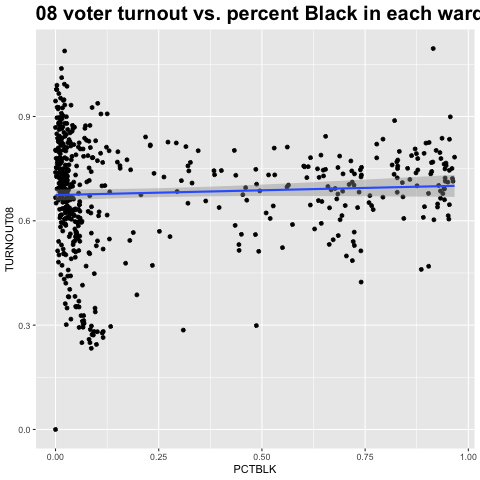

In [8]:
%%R
# And plotting the 2008 presidential election voter turnout
# By the percent of Black adults in each ward

ggplot(mil_04_08) +
    aes(x=PCTBLK, y=TURNOUT08) +
    geom_point() +
    geom_smooth(method="lm") +
    theme(plot.title = element_text(size=20, face="bold")) +
    labs(title = "08 voter turnout vs. percent Black in each ward", x = "PCTBLK", y = "TURNOUT08")

In [9]:
%%R

model <- lm(TURNOUT08 ~ PCTBLK, data=mil_04_08)
summary(model)


Call:
lm(formula = TURNOUT08 ~ PCTBLK, data = mil_04_08)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.67410 -0.06695  0.02025  0.09675  0.41370 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.674097   0.008191  82.295   <2e-16 ***
PCTBLK      0.027321   0.020274   1.348    0.178    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.1567 on 568 degrees of freedom
Multiple R-squared:  0.003187,	Adjusted R-squared:  0.001432 
F-statistic: 1.816 on 1 and 568 DF,  p-value: 0.1783



`geom_smooth()` using formula = 'y ~ x'


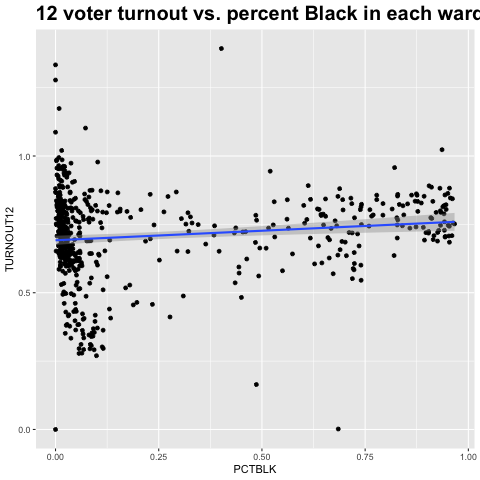

In [45]:
%%R -i mil_12_20

ggplot(mil_12_20) +
    aes(x=BLACK18/PERSONS18, y=TURNOUT12) +
    geom_point() +
    geom_smooth(method="lm") +
    theme(plot.title = element_text(size=20, face="bold")) +
    labs(title = "12 voter turnout vs. percent Black in each ward", x = "PCTBLK", y = "TURNOUT12")

`geom_smooth()` using formula = 'y ~ x'


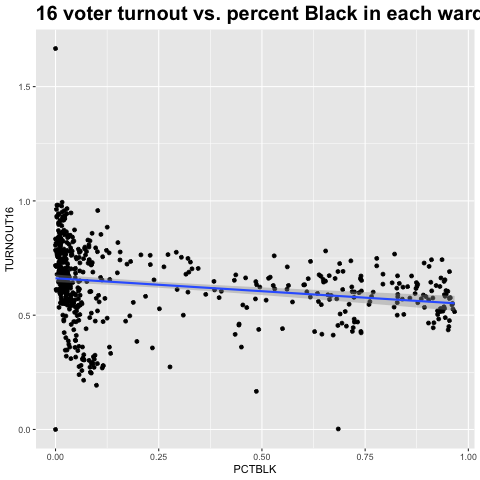

In [46]:
%%R

ggplot(mil_12_20) +
    aes(x=BLACK18/PERSONS18, y=TURNOUT16) +
    geom_point() +
    geom_smooth(method="lm") +
    theme(plot.title = element_text(size=20, face="bold")) +
    labs(title = "16 voter turnout vs. percent Black in each ward", x = "PCTBLK", y = "TURNOUT16")

`geom_smooth()` using formula = 'y ~ x'


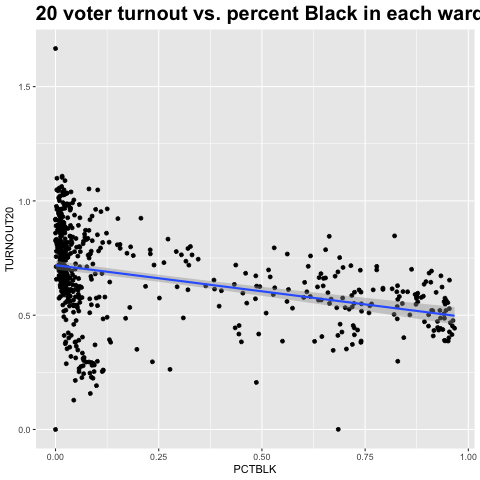

In [47]:
%%R

ggplot(mil_12_20) +
    aes(x=BLACK18/PERSONS18, y=TURNOUT20) +
    geom_point() +
    geom_smooth(method="lm") +
    theme(plot.title = element_text(size=20, face="bold")) +
    labs(title = "20 voter turnout vs. percent Black in each ward", x = "PCTBLK", y = "TURNOUT20")

### Calculating percentage of Black adults in each voting ward in Milwaukee County

In [23]:
mil_04_08["PCTBLK"] = (mil_04_08["BLACK18"]/mil_04_08["PERSONS18"]).astype(float)

The PCTBLK wards and percents are the same across 2012 - 2020 data. This is because the state legislature decides the demographics of each ward, from 2012 to 2020, based on the same census data collected in 2010.

The data can be different in 2008 because it is based on census data collected in 2000.

In [11]:
# mil_12_20["PCTBLK"] = (mil_12_20["BLACK18"]/mil_12_20["PERSONS18"]).astype(float)

In [12]:
# mil_08[mil_08["PCTBLK"] > 0.9]

### Now put percent of Black residents into 10 bucket to visualize voter turnout
 in areas with 0-10%, 10-20%, 20-30%, 20-40%, 40-50%, 50-60%, 60-70%, 70-80%, 80-90%, and 90-100% Black

In [13]:
# mil_08['PCTBUCKET'] = np.where(mil_08['PCTBLK'] < 0.1, 1,\
#                     np.where((0.1 <= mil_08["PCTBLK"]) & (mil_08["PCTBLK"] < 0.2), 2,\
#                     np.where((mil_08['PCTBLK'] >= 0.2) & (mil_08["PCTBLK"] < 0.3), 3,\
#                     np.where((mil_08['PCTBLK'] >= 0.3) & (mil_08["PCTBLK"] < 0.4), 4,\
#                     np.where((mil_08['PCTBLK'] >= 0.4) & (mil_08["PCTBLK"] < 0.5), 5,\
#                     np.where((mil_08['PCTBLK'] >= 0.5) & (mil_08["PCTBLK"] < 0.6), 6,\
#                     np.where((mil_08['PCTBLK'] >= 0.6) & (mil_08["PCTBLK"] < 0.7), 7,\
#                     np.where((mil_08['PCTBLK'] >= 0.7) & (mil_08["PCTBLK"] < 0.8), 8,\
#                     np.where((mil_08['PCTBLK'] >= 0.8) & (mil_08["PCTBLK"] < 0.9), 9,\
#                     np.where((mil_08['PCTBLK'] >= 0.9) & (mil_08["PCTBLK"] < 1), 10, \
#                              mil_08['PCTBUCKET']))))))))))


In [14]:
# mil_08[mil_08["PCTBUCKET"] == 10]

In [15]:
%%R -i 

UsageError: %%R is a cell magic, but the cell body is empty. Did you mean the line magic %R (single %)?
